In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
datos = pd.DataFrame()

In [4]:
def transform_data(df: pd.DataFrame):
    # Crear la columna de fecha
    # df['Fecha'] = pd.to_datetime(df[['ANO', 'MES', 'DIA']], format='YYYY-MM-DD')

    df = df.rename(columns={'ANO': 'year', 'MES': 'month', 'DIA': 'day'})
    
    # Crear la columna de fecha correctamente
    df['Fecha'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Filtrar las columnas de horas
    columnas_horas = [col for col in df.columns if col.startswith('H')]

    # Convertir el formato a filas
    df_melted = df.melt(id_vars=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'Fecha'], 
                        value_vars=columnas_horas, 
                        var_name='Hora', 
                        value_name='Valor')

    # Convertir la columna 'Hora' a número de hora
    df_melted['Hora'] = df_melted['Hora'].str[1:].astype(int) - 1  # Eliminar 'H' y ajustar a formato de 24h
    return df_melted

In [5]:
def create_new_data(last_df: pd.DataFrame, next_df: pd.DataFrame):
    print('asd')
    # Extraer el mes y el día, ignorando el año
    last_df['Mes'] = last_df['Fecha'].dt.month
    last_df['Día'] = last_df['Fecha'].dt.day
    next_df['Mes'] = next_df['Fecha'].dt.month
    next_df['Día'] = next_df['Fecha'].dt.day

    # Hacer merge basado en Mes y Día
    merged_df = pd.merge(last_df, next_df, on=['Mes', 'Día'], suffixes=('_last', '_next'), how='left')

    # Calcular la media de la columna 'Valor'
    merged_df['Valor'] = merged_df[['Valor_last', 'Valor_next']].mean(axis=1)

    # Seleccionar solo las columnas necesarias
    mean_df = merged_df[['Fecha_last', 'Fecha_next', 'Valor']]  # Conservar ambas fechas originales

    display(mean_df)
    return mean_df

In [6]:
ruta = '../../../data/raw/madrid_data/horarios'
meses = ['ene', 'feb', 'mar', 'abr', 'may', 'jun', 'jul', 'ago', 'sep', 'oct', 'nov', 'dic']
anhos = ['19', '20', '21', '22', '23', '24', '25']

In [7]:
lista_dfs = []

for anho in anhos:
    for mes in meses:
        try:
            file = f'{ruta}/20{anho}/{mes}_meteo{anho}.csv'
            print(f"Procesando: {file}")
            df = pd.read_csv(file, sep=';')

            # Verificar si el DataFrame tiene datos
            if df.empty:
                print(f"⚠️ Archivo vacío: {file}")
                continue  # Saltar al siguiente archivo

            # Transformar los datos
            df_transformado = transform_data(df)

            # Verificar si la transformación devuelve un DataFrame válido
            if isinstance(df_transformado, pd.DataFrame):
                lista_dfs.append(df_transformado)  # Agregar a la lista
            else:
                print(f"⚠️ Error en la transformación del archivo: {file}")

        except Exception as e:
            print(f"❌ ERROR al procesar {file}: {e}")

# Concatenar todos los DataFrames en uno solo
if lista_dfs:
    datos = pd.concat(lista_dfs, ignore_index=True)
else:
    print("⚠️ No se pudo cargar ningún archivo.")

Procesando: ../../../data/raw/madrid_data/horarios/2019/ene_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/feb_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/mar_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/abr_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/may_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/jun_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/jul_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/ago_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/sep_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/oct_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/nov_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2019/dic_meteo19.csv
Procesando: ../../../data/raw/madrid_data/horarios/2020/ene_meteo20.csv
Procesando: ../../../data/raw/madrid_data/horarios/2020/feb_mete

In [8]:
datos.sort_values(by=['Hora', 'Fecha'], ascending=True, inplace=True)
datos

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,Fecha,Hora,Valor
0,28,79,102,81,28079102_81_98,2019-01-01,0,0.65
31,28,79,102,82,28079102_82_98,2019-01-01,0,64.00
62,28,79,102,83,28079102_83_98,2019-01-01,0,3.10
93,28,79,102,86,28079102_86_98,2019-01-01,0,50.00
124,28,79,102,87,28079102_87_98,2019-01-01,0,949.00
...,...,...,...,...,...,...,...,...
4575055,28,79,59,83,28079059_83_98,2025-02-28,23,11.50
4575083,28,79,59,86,28079059_86_98,2025-02-28,23,58.00
4575111,28,79,59,87,28079059_87_98,2025-02-28,23,936.00
4575139,28,79,59,88,28079059_88_98,2025-02-28,23,1.00


In [9]:
magnitudes_dict = {
    81: "VELOCIDAD VIENTO",
    82: "DIR. DE VIENTO",
    83: "TEMPERATURA",
    86: "HUMEDAD RELATIVA",
    87: "PRESION BARIOMETRICA",
    88: "RADIACION SOLAR",
    89: "PRECIPITACIÓN"
}

# Asegurar que los datos tengan los tipos correctos
datos["MAGNITUD"] = datos["MAGNITUD"].astype(int)
datos["Valor"] = pd.to_numeric(datos["Valor"], errors="coerce")

# Agregar la descripción de la magnitud
datos["MAGNITUD_DESC"] = datos["MAGNITUD"].map(magnitudes_dict)


# Filtrar solo por MUNICIPIO 79 y ESTACION 102
df_filtrado = datos[datos["ESTACION"] == 102]

# Pivotar el DataFrame filtrado
df_pivotado = df_filtrado.pivot(index=["PROVINCIA", "MUNICIPIO", "ESTACION", "Fecha", "Hora"], 
                                columns="MAGNITUD_DESC", 
                                values="Valor").reset_index()

In [10]:
df_pivotado

MAGNITUD_DESC,PROVINCIA,MUNICIPIO,ESTACION,Fecha,Hora,DIR. DE VIENTO,HUMEDAD RELATIVA,PRECIPITACIÓN,PRESION BARIOMETRICA,RADIACION SOLAR,TEMPERATURA,VELOCIDAD VIENTO
0,28,79,102,2019-01-01,0,64.0,50.0,0.0,949.0,0.0,3.1,0.65
1,28,79,102,2019-01-01,1,32.0,49.0,0.0,949.0,0.0,2.9,0.95
2,28,79,102,2019-01-01,2,62.0,46.0,0.0,949.0,0.0,3.1,0.87
3,28,79,102,2019-01-01,3,75.0,51.0,0.0,949.0,0.0,1.9,0.73
4,28,79,102,2019-01-01,4,53.0,56.0,0.0,949.0,0.0,0.7,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...
48643,28,79,102,2025-02-28,19,173.0,49.0,0.0,939.0,1.0,12.5,0.95
48644,28,79,102,2025-02-28,20,113.0,53.0,0.0,938.0,1.0,9.2,3.00
48645,28,79,102,2025-02-28,21,126.0,56.0,0.0,938.0,1.0,8.5,3.17
48646,28,79,102,2025-02-28,22,110.0,61.0,0.0,938.0,1.0,7.8,3.22


In [11]:
# Generar el rango de fechas y horas cada 1 hora
fecha_hora = pd.date_range(start='2019-01-01', end='2025-02-28', freq='1H')

# Crear un DataFrame con la fecha y la hora separadas
df_horario = pd.DataFrame({
    "Fecha": fecha_hora.date,  # Extrae solo la fecha
    "Hora": fecha_hora.hour,    # Extrae solo la hora
    "ESTACION": 102
})

# Asegurar que las columnas "Fecha" en ambos DataFrames sean del mismo tipo (datetime.date)
df_pivotado["Fecha"] = pd.to_datetime(df_pivotado["Fecha"]).dt.date

# Hacer la fusión con left join para mantener todas las horas incluso si faltan datos en df_pivotado
df_final = df_horario.merge(df_pivotado, how='left', on=['Fecha', 'Hora'])

C:\Users\Tore\AppData\Local\Temp\ipykernel_18880\2636793059.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fecha_hora = pd.date_range(start='2019-01-01', end='2025-02-28', freq='1H')


In [12]:
df_final['Fecha'] = pd.to_datetime(df_final['Fecha'])

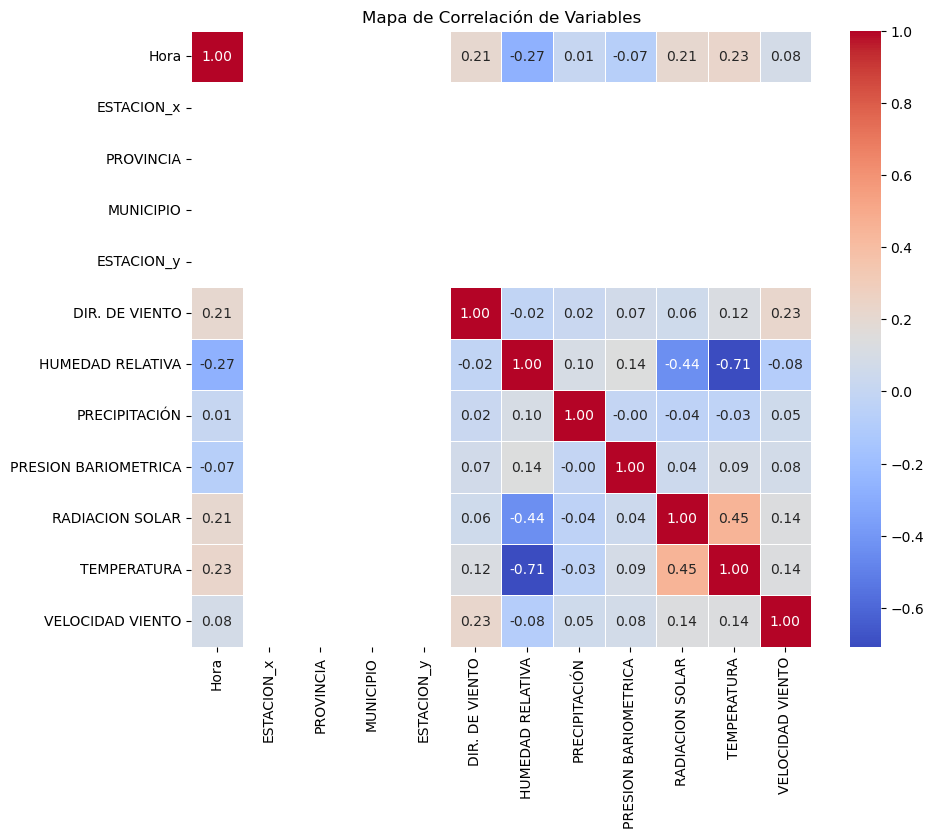

In [13]:
# Crear el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación de Variables")
plt.show()

In [14]:
df_final.drop(columns=['PROVINCIA', 'MUNICIPIO', 'PRESION BARIOMETRICA', 'DIR. DE VIENTO', 'VELOCIDAD VIENTO', "PRECIPITACIÓN", "RADIACION SOLAR", 'ESTACION_y'], inplace=True)

In [15]:
df_final.isna().sum()

Fecha                  0
Hora                   0
ESTACION_x             0
HUMEDAD RELATIVA    5376
TEMPERATURA         5376
dtype: int64

In [16]:
df_final

,Fecha,Hora,ESTACION_x,HUMEDAD RELATIVA,TEMPERATURA
0,2019-01-01,0,102,50.0,3.1
1,2019-01-01,1,102,49.0,2.9
2,2019-01-01,2,102,46.0,3.1
3,2019-01-01,3,102,51.0,1.9
4,2019-01-01,4,102,56.0,0.7
...,...,...,...,...,...
53996,2025-02-27,20,102,55.0,8.2
53997,2025-02-27,21,102,58.0,7.6
53998,2025-02-27,22,102,63.0,6.8
53999,2025-02-27,23,102,66.0,6.2


In [17]:
df_final.to_csv('../../../data/homogenized/madrid_data/homogenized_data.csv', index=False)